In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/wine_quality_merged.csv")

In [7]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [9]:
data.shape

(6497, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [14]:
data.skew(numeric_only=True)

,0
fixed acidity,1.723290
volatile acidity,1.495097
citric acid,0.471731
residual sugar,1.435404
chlorides,5.399828
free sulfur dioxide,1.220066
total sulfur dioxide,-0.001177
density,0.503602
pH,0.386839
sulphates,1.797270


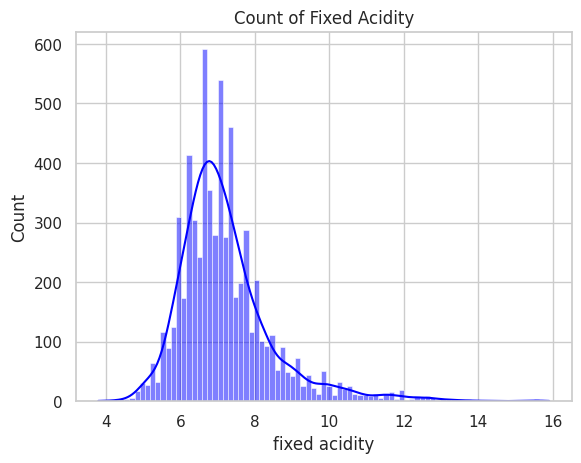

In [15]:
sns.set_theme(style="whitegrid")
sns.histplot(data["fixed acidity"],kde=True,color="blue")
plt.title("Count of Fixed Acidity")
plt.show()

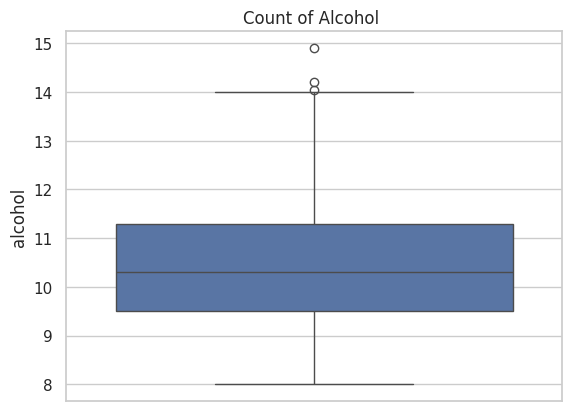

In [16]:
sns.boxplot(data["alcohol"])
plt.title("Count of Alcohol ")
plt.show()

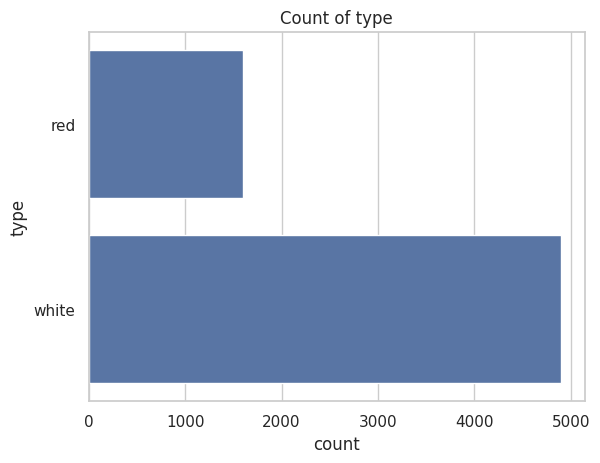

In [17]:
sns.countplot(data["type"])
plt.title("Count of type")
plt.show()

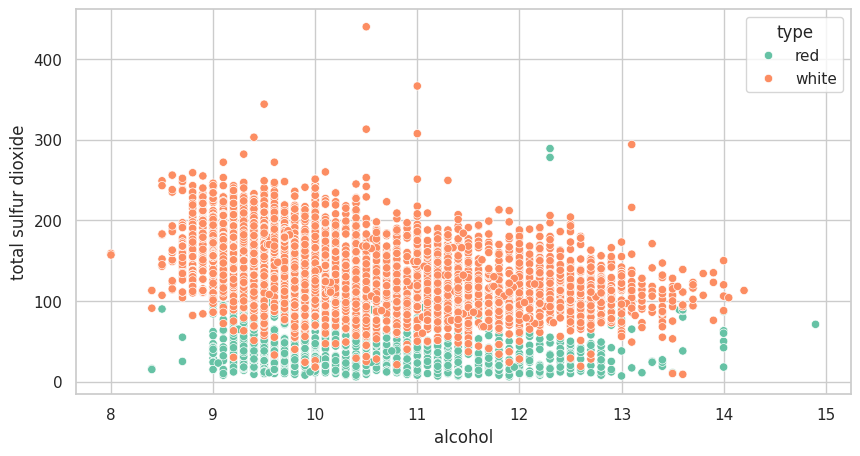

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,hue="type",y="total sulfur dioxide" ,x="alcohol",palette="Set2")
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
data["type"]=le.fit_transform(data["type"])

In [21]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


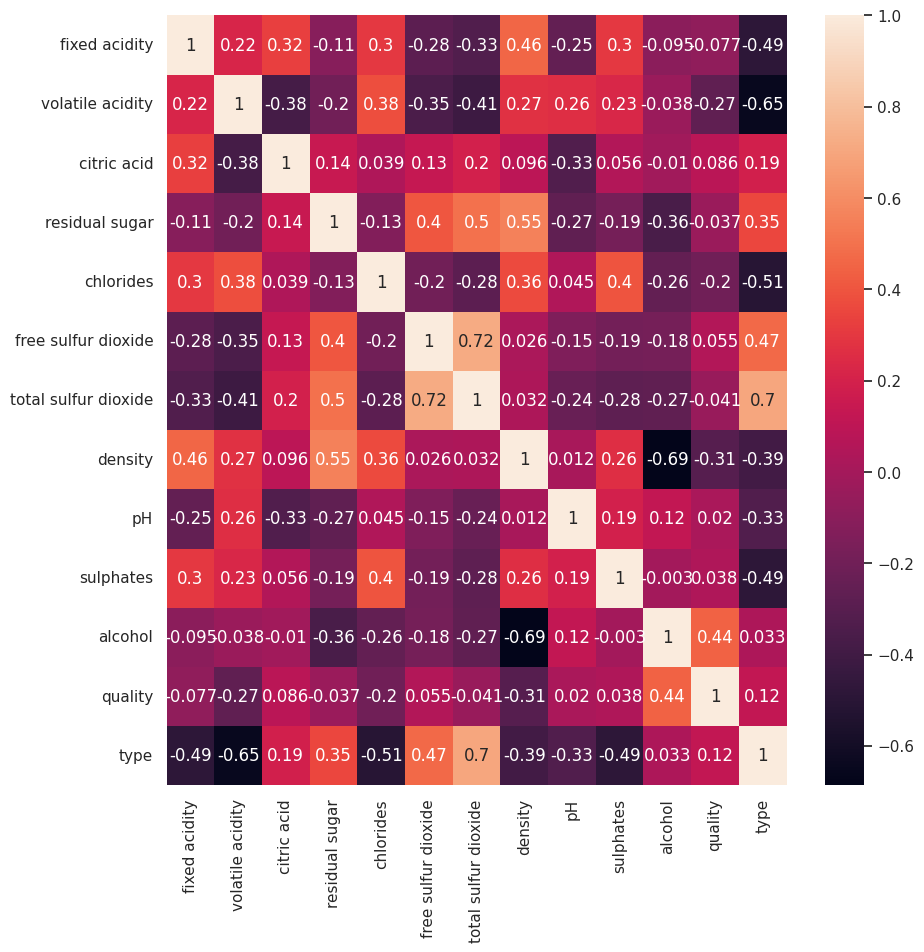

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True) # for showing no.s annot=True
plt.show()

In [24]:
#train test split
from sklearn.model_selection import train_test_split

In [25]:
x= data.drop("type",axis=1)
y= data["type"]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dtc = dt.predict(x_test)

In [28]:
# accuracy and confusion matrix dekhna h
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
print("accuracy",accuracy_score(y_test,y_pred_dtc))

accuracy 0.9830769230769231


In [30]:
cm = confusion_matrix(y_test,y_pred_dtc)

In [31]:
print(cm)

[[332   9]
 [ 13 946]]


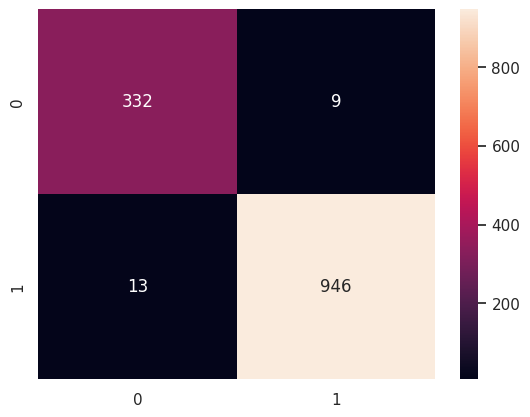

In [32]:
# wea re going to visualize cm
sns.heatmap(cm,annot=True,fmt="d") # here 3.3e+02 ni aane ke liye ham format FMT="digit" dalthe h
plt.show()
#testing wale here 1st qaudrant 329 jiska answer tha red wine and model ne bhi red wine print kia
# 948 white wine tha aur usne bhi white wine predict kia
# 12 wala red wine tha but usne white wine predict kia toh usne usko false predict kia
# 11 white wine tha but usne red wine predict kia toh usne usko false predict kia
# 329,and 948 true value h and baki dono false value h

In [33]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy",accuracy_score(y_test,y_pred_rf))

accuracy 0.9946153846153846


In [35]:
cm = confusion_matrix(y_test,y_pred_rf)

In [36]:
print(cm)

[[335   6]
 [  1 958]]


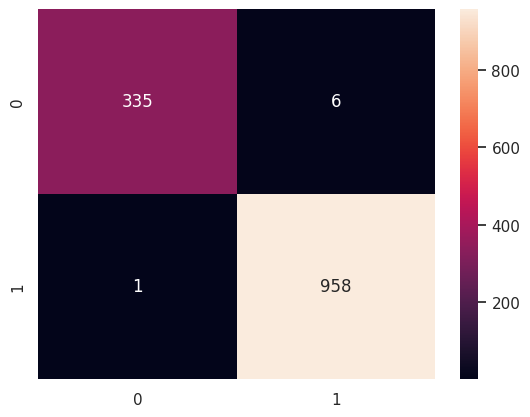

In [37]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [38]:
# XG boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy",accuracy_score(y_test,y_pred_xgb))

accuracy 0.9946153846153846


In [40]:
cm = confusion_matrix(y_test,y_pred_rf)

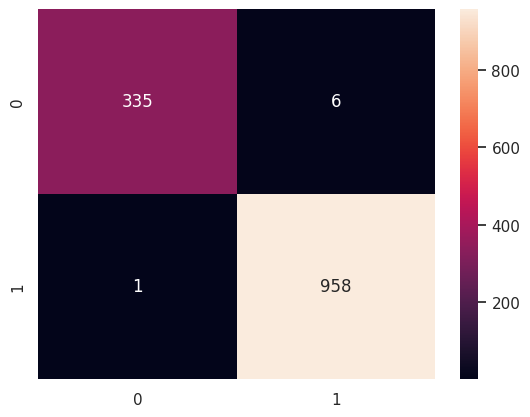

In [41]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x=data.drop("type",axis=1) # spltting to target and Features variable
y=data["type"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42 )

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

 # fitting model
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(x_test)

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [48]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.11955029528691374
MSE is 0.02739859803844216
R2 is 0.8584069100420243


In [49]:
importance=dt.feature_importances_  # features ka naam h
features = x.columns

In [50]:
fea_imp= pd.DataFrame({"Features":features,"Importance":importance})

In [51]:
fea_imp.head(5)

,Features,Importance
0,fixed acidity,0.006034
1,volatile acidity,0.049748
2,citric acid,0.000636
3,residual sugar,0.004204
4,chlorides,0.206913


In [52]:
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [53]:
fea_imp.head(5)

,Features,Importance
6,total sulfur dioxide,0.689492
4,chlorides,0.206913
1,volatile acidity,0.049748
9,sulphates,0.014824
7,density,0.013127


In [54]:
fea_imp.tail(5)

,Features,Importance
3,residual sugar,0.004204
10,alcohol,0.003344
5,free sulfur dioxide,0.000975
2,citric acid,0.000636
11,quality,0.000000


In [55]:
fea_imp=fea_imp.sort_values(by="Importance",ascending=False).head(5)

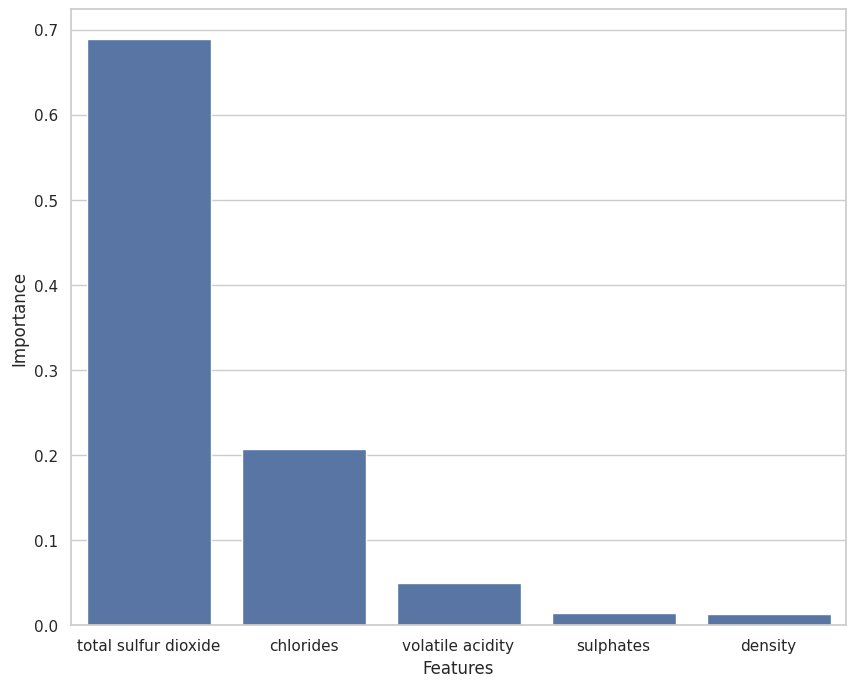

In [56]:


plt.figure(figsize=(10,8))
sns.barplot(data=fea_imp,x="Features",y="Importance", )
plt.show()

In [57]:
# saving the model
# so in future we can directly start from here
import joblib

In [58]:
joblib.dump(dt,"wine_quality_model")

['wine_quality_model']

In [59]:
#for Download
from google.colab import files
files.download("wine_quality_model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>